In [63]:
from utils import plot_decision_boundary, poly_linear_regression, CM_BRIGHT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
%matplotlib inline 

## 1. Carga de datos y división train/test

In [64]:
airbnb_data = pd.read_csv("./airbnb-listings-extract.csv", sep=";", decimal=".")
print(airbnb_data.shape)
airbnb_data.head(5).T

(14780, 89)


0  \
ID                                                                       11210388   
Listing Url                                 https://www.airbnb.com/rooms/11210388   
Scrape ID                                                          20170306202425   
Last Scraped                                                           2017-03-07   
Name                                               The Loft-Full Bath-Deck w/View   
...                                                                           ...   
Cancellation Policy                                                      moderate   
Calculated host listings count                                                1.0   
Reviews per Month                                                             3.5   
Geolocation                                          30.3373609355,-97.8632766782   
Features                        Host Is Superhost,Host Has Profile Pic,Host Id...   

                                                                                1  \
ID                                                                       17471131   
Listing Url                                 https://www.airbnb.com/rooms/17471131   
Scrape ID                                                          20170407214050   
Last Scraped                                                           2017-04-08   
Name                                                   Claris I, Friendly Rentals   
...                                                                           ...   
Cancellation Policy                                               super_strict_30   
Calculated host listings count                                              106.0   
Reviews per Month                                                            0.86   
Geolocation                                           41.3896829422,2.17262543017   
Features                        Host Has Profile Pic,Requires License,Instant ...   

                                                                                2  \
ID                                                                       17584891   
Listing Url                                 https://www.airbnb.com/rooms/17584891   
Scrape ID                                                          20170407214050   
Last Scraped                                                           2017-04-08   
Name                                          Style Terrace Red, Friendly Rentals   
...                                                                           ...   
Cancellation Policy                                               super_strict_30   
Calculated host listings count                                              106.0   
Reviews per Month                                                             NaN   
Geolocation                                           41.3930345489,2.16217327868   
Features                        Host Has Profile Pic,Requires License,Instant ...   

                                                                                3  \
ID                                                                        5398030   
Listing Url                                  https://www.airbnb.com/rooms/5398030   
Scrape ID                                                          20170407214050   
Last Scraped                                                           2017-04-08   
Name                                            Picasso Suite 1.4 Paseo de Gracia   
...                                                                           ...   
Cancellation Policy                                                        strict   
Calculated host listings count                                               24.0   
Reviews per Month                                                            1.09   
Geolocation                                            41.3969668101,2.1674178103   
Features                        Host Has Profile Pic,Host Identity Verified,Re... 

In [65]:
train, test = train_test_split(airbnb_data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

train.to_csv('./airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./airbnb_test.csv', sep=';', decimal='.', index=False)

airbnb_data = pd.read_csv('./airbnb_train.csv', sep=';', decimal='.')
airbnb_data.head(5).T

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


0  \
ID                                                                        5994463   
Listing Url                                  https://www.airbnb.com/rooms/5994463   
Scrape ID                                                          20170407214119   
Last Scraped                                                           2017-04-08   
Name                                             PISO ATOCHA- FLAT NEAR ATOCHA  .   
...                                                                           ...   
Cancellation Policy                                                      moderate   
Calculated host listings count                                                2.0   
Reviews per Month                                                             0.5   
Geolocation                                          40.4077318793,-3.68481869733   
Features                        Host Has Profile Pic,Is Location Exact,Require...   

                                                                                1  \
ID                                                                       14136180   
Listing Url                                 https://www.airbnb.com/rooms/14136180   
Scrape ID                                                          20170407214119   
Last Scraped                                                           2017-04-08   
Name                                                       The Palace Sol Madrid.   
...                                                                           ...   
Cancellation Policy                                                      flexible   
Calculated host listings count                                                1.0   
Reviews per Month                                                            2.43   
Geolocation                                          40.4158022422,-3.70534037765   
Features                        Host Has Profile Pic,Host Identity Verified,Re...   

                                                                                2  \
ID                                                                       15520134   
Listing Url                                 https://www.airbnb.com/rooms/15520134   
Scrape ID                                                          20170407214119   
Last Scraped                                                           2017-04-08   
Name                               por persona la noche metro linea5 vista alegre   
...                                                                           ...   
Cancellation Policy                                                      moderate   
Calculated host listings count                                               16.0   
Reviews per Month                                                             NaN   
Geolocation                                          40.3890481626,-3.74037392557   
Features                        Host Has Profile Pic,Host Identity Verified,Is...   

                                                                    3  \
ID                                                            8809721   
Listing Url                      https://www.airbnb.com/rooms/8809721   
Scrape ID                                              20170407214119   
Last Scraped                                               2017-04-08   
Name                              CITY CENTER JACINTO BENAVENTE ROOM4   
...                                                               ...   
Cancellation Policy                                            strict   
Calculated host listings count                                   97.0   
Reviews per Month                                                 NaN   
Geolocation                              40.4128140929,-3.70305247638   
Features                        Host Has Profile Pic,Requires License   

                                                                                4  
ID                                                      

# 2. Análisis exploratorio

In [66]:
airbnb_data.describe()

ID     Scrape ID       Host ID  Host Response Rate  \
count  1.182400e+04  1.182400e+04  1.182400e+04        10317.000000   
mean   1.025308e+07  2.017038e+13  3.588310e+07           94.803722   
std    5.566485e+06  5.505346e+08  3.411993e+07           15.247078   
min    1.986400e+04  2.016010e+13  1.745300e+04            0.000000   
25%    5.510692e+06  2.017041e+13  6.855490e+06          100.000000   
50%    1.125754e+07  2.017041e+13  2.454770e+07          100.000000   
75%    1.531982e+07  2.017041e+13  5.431096e+07          100.000000   
max    1.858361e+07  2.017062e+13  1.247534e+08          100.000000   

       Host Listings Count  Host Total Listings Count      Latitude  \
count         11821.000000               11821.000000  11824.000000   
mean             12.754420                  12.754420     40.491628   
std              34.578895                  34.578895      4.701030   
min               0.000000                   0.000000    -37.851182   
25%               1.000000                   1.000000     40.409758   
50%               2.000000                   2.000000     40.419331   
75%               6.000000                   6.000000     40.430778   
max             519.000000                 519.000000     55.966912   

          Longitude  Accommodates     Bathrooms  ...  Number of Reviews  \
count  11824.000000  11824.000000  11780.000000  ...       11824.000000   
mean      -3.776863      3.277486      1.285229  ...          22.664834   
std       14.014695      2.093973      0.664691  ...          38.092338   
min     -123.124429      1.000000      0.000000  ...           0.000000   
25%       -3.707538      2.000000      1.000000  ...           1.000000   
50%       -3.700763      3.000000      1.000000  ...           7.000000   
75%       -3.683917      4.000000      1.000000  ...          27.000000   
max      153.371427     16.000000      8.000000  ...         356.000000   

       Review Scores Rating  Review Scores Accuracy  \
count           9163.000000             9143.000000   
mean              91.628179                9.410040   
std                9.137614                0.938013   
min               20.000000                2.000000   
25%               89.000000                9.000000   
50%               94.000000               10.000000   
75%               98.000000               10.000000   
max              100.000000               10.000000   

       Review Scores Cleanliness  Review Scores Checkin  \
count                9148.000000            9136.000000   
mean                    9.320726               9.623905   
std                     1.004472               0.804050   
min                     2.000000               2.000000   
25%                     9.000000               9.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       Review Scores Communication  Review Scores Location  \
count                  9147.000000             9133.000000   
mean                      9.647863                9.534655   
std                       0.765450                0.770421   
min                       2.000000                2.000000   
25%                       9.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       Review Scores Value  Calculated host listings count  Reviews per Month  
count          9132.000000                    11820.000000        9285.000000  
mean              9.211345                        9.615313           1.873326  
std               0.963131                       23.795580           1.869157  
min               2.000000                        1.000000           0.020000  
25%               9.000000                        1.000000           0.450

In [67]:
print(airbnb_data.dtypes)

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object


In [68]:
print(airbnb_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11824 non-null  int64  
 1   Listing Url                     11824 non-null  object 
 2   Scrape ID                       11824 non-null  int64  
 3   Last Scraped                    11824 non-null  object 
 4   Name                            11823 non-null  object 
 5   Summary                         11355 non-null  object 
 6   Space                           8718 non-null   object 
 7   Description                     11818 non-null  object 
 8   Experiences Offered             11824 non-null  object 
 9   Neighborhood Overview           7309 non-null   object 
 10  Notes                           4543 non-null   object 
 11  Transit                         7243 non-null   object 
 12  Access                          

+ Histograma de precios

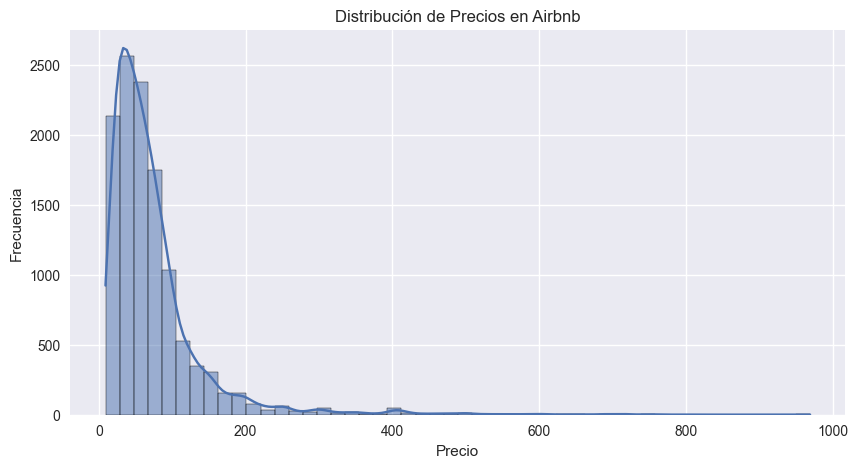

In [69]:
plt.figure(figsize=(10, 5))
sns.histplot(airbnb_data["Price"], bins=50, kde=True)
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios en Airbnb")
plt.show()

+ Boxplot para detectar outliers

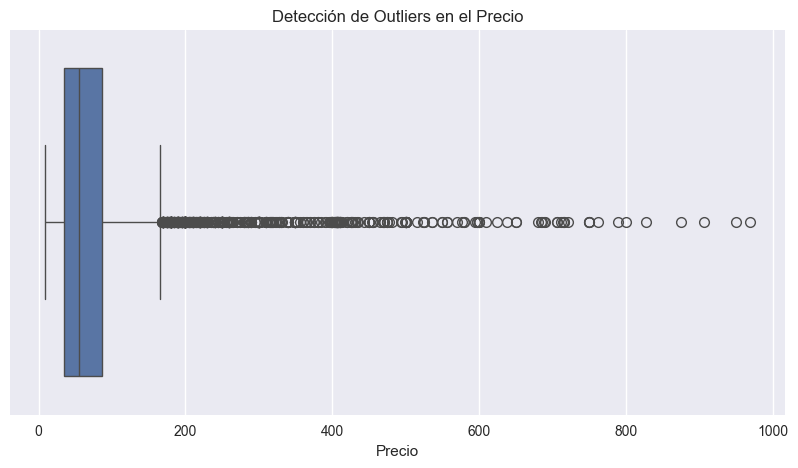

In [70]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=airbnb_data["Price"])
plt.xlabel("Precio")
plt.title("Detección de Outliers en el Precio")
plt.show()

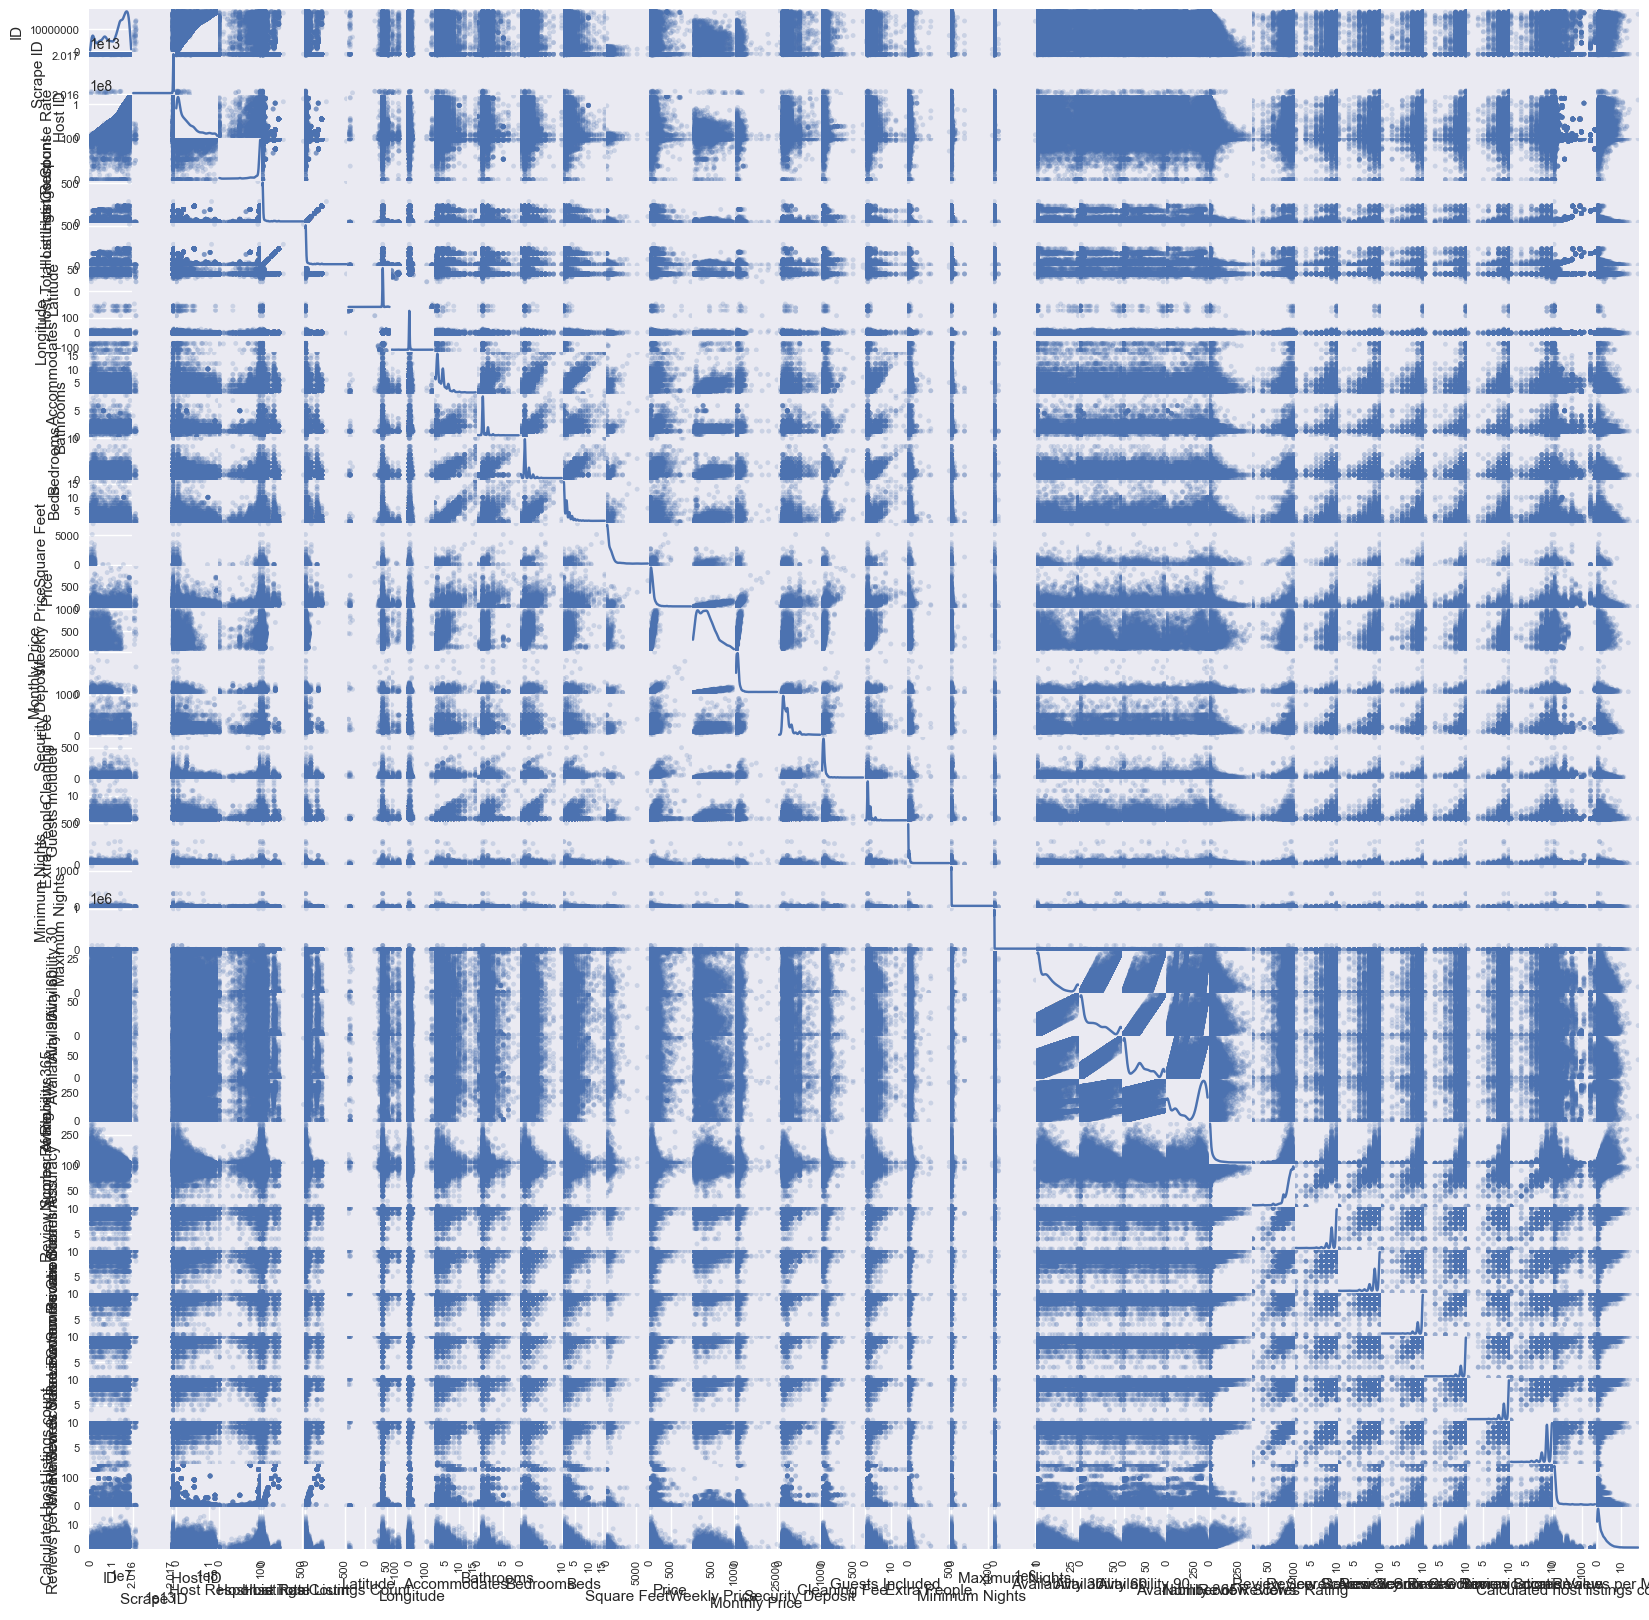

In [71]:
pd.plotting.scatter_matrix(airbnb_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

# 3. Preprocesamiento

+ Eliminamos manualmente variables irrevelantes

In [ ]:
airbnb_data = airbnb_data.drop(
    columns=[
        "ID",
        "Scrape ID",
        "Listing Url",
        "Host ID",
        "Host URL",
        "Host Name",
        "Name",
        "Summary",
        "Description",
        "Space",
        "Neighborhood Overview",
        "Notes",
        "Transit",
        "Access",
        "Interaction",
        "House Rules",
        "Thumbnail Url",
        "Medium Url",
        "Picture Url",
        "XL Picture Url",
        "Host Thumbnail Url",
        "Host Picture Url",
        "Square Feet",
        "License",
        "Jurisdiction Names",
        "Host Acceptance Rate",
        "Neighbourhood",
        "Street",
        "Zipcode",
        "Market",
        "Smart Location",
        "Country Code",
        "Country",
        "Geolocation",
        "Features",
        "Host About",
        "Host Location",
        "Host Neighbourhood",
        "Host Verifications",
    ],
    errors="ignore",
)

+ Verficamos cuantos valores nulos existen

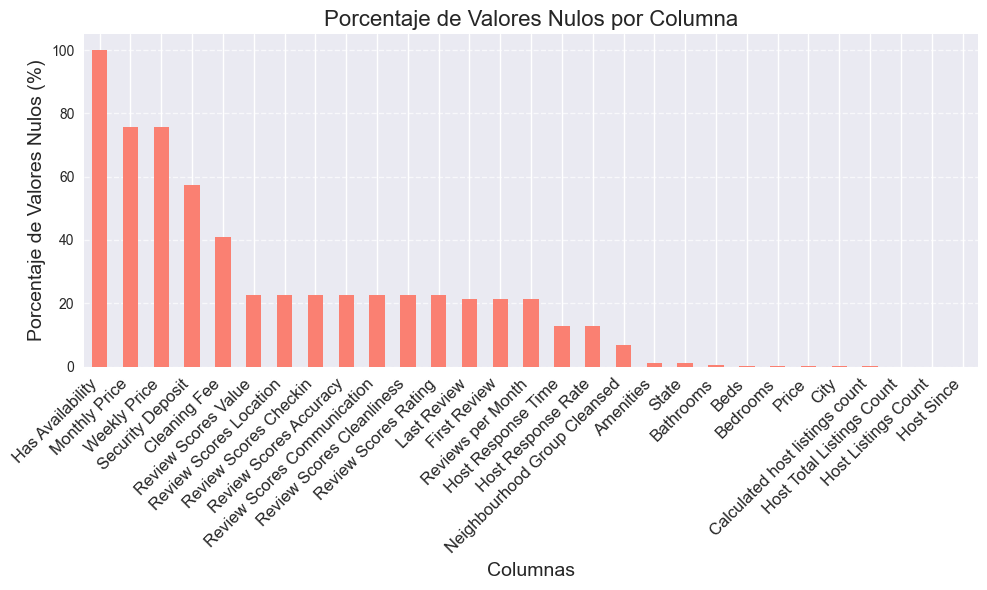

In [73]:
missing_values = airbnb_data.isnull().sum() / len(airbnb_data) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_values.plot(kind="bar", color="salmon")

plt.title("Porcentaje de Valores Nulos por Columna", fontsize=16)
plt.xlabel("Columnas", fontsize=14)
plt.ylabel("Porcentaje de Valores Nulos (%)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

+ Eliminamos las columnas que tengan más del 30% de valores nulos

In [74]:
umbral = 30
delete_columns = missing_values[missing_values > umbral].index
airbnb_data = airbnb_data.drop(columns=delete_columns)

print(f"Columnas eliminadas (más del {umbral}% de valores nulos):")
print(delete_columns)

Columnas eliminadas (más del 30% de valores nulos):
Index(['Has Availability', 'Monthly Price', 'Weekly Price', 'Security Deposit',
       'Cleaning Fee'],
      dtype='object')


+ Imputar valores nulos en columnas numéricas usando la mediana

In [75]:
num_cols = airbnb_data.select_dtypes(include=["number"]).columns

for col in num_cols:
    median_value = airbnb_data[col].median()
    airbnb_data[col].fillna(median_value, inplace=True)

+ Imputar valores categóricos con NA antes de codificarlos

In [76]:
cat_cols = airbnb_data.select_dtypes(include=["object"]).columns
for col in cat_cols:
    airbnb_data[col].fillna("NA", inplace=True)

+ Codificar variables categoricas

In [77]:
for col in cat_cols:
    le = LabelEncoder()
    airbnb_data[col] = le.fit_transform(airbnb_data[col].astype(str))

+ Eliminamos valores atipicos que vimos en el Boxplot para detectar outliers, a partir de 820 se dispara un poco los resultados.

In [78]:
airbnb_data = airbnb_data[airbnb_data['Price'] <= 820]

+ Generamos nuevas variables que nos pueden servir

In [ ]:
# # 1. Precio por Persona
# # Evitamos división por cero (se asume que 'Accommodates' es al menos 1)
# airbnb_data['Price_Per_Person'] = airbnb_data['Price'] / airbnb_data['Accommodates']
# # airbnb_data['Price_Per_Person']
# airbnb_data['Price_Per_Person'][airbnb_data['Price_Per_Person'] > 0]
# # 2. Relación Baños-Habitaciones
# # # Si 'Bedrooms' es 0, podemos asignar un valor predeterminado (por ejemplo, igual a 'Bathrooms' o 0)
# # airbnb_data['Bathrooms_to_Bedrooms_Ratio'] = np.where(airbnb_data['Bedrooms'] > 0, airbnb_data['Bathrooms'] / airbnb_data['Bedrooms'], 0)

+ Después de eliminar, imputar y codificar datos podemos ver la correlación con Precio y ver si podemos eliminar más datos

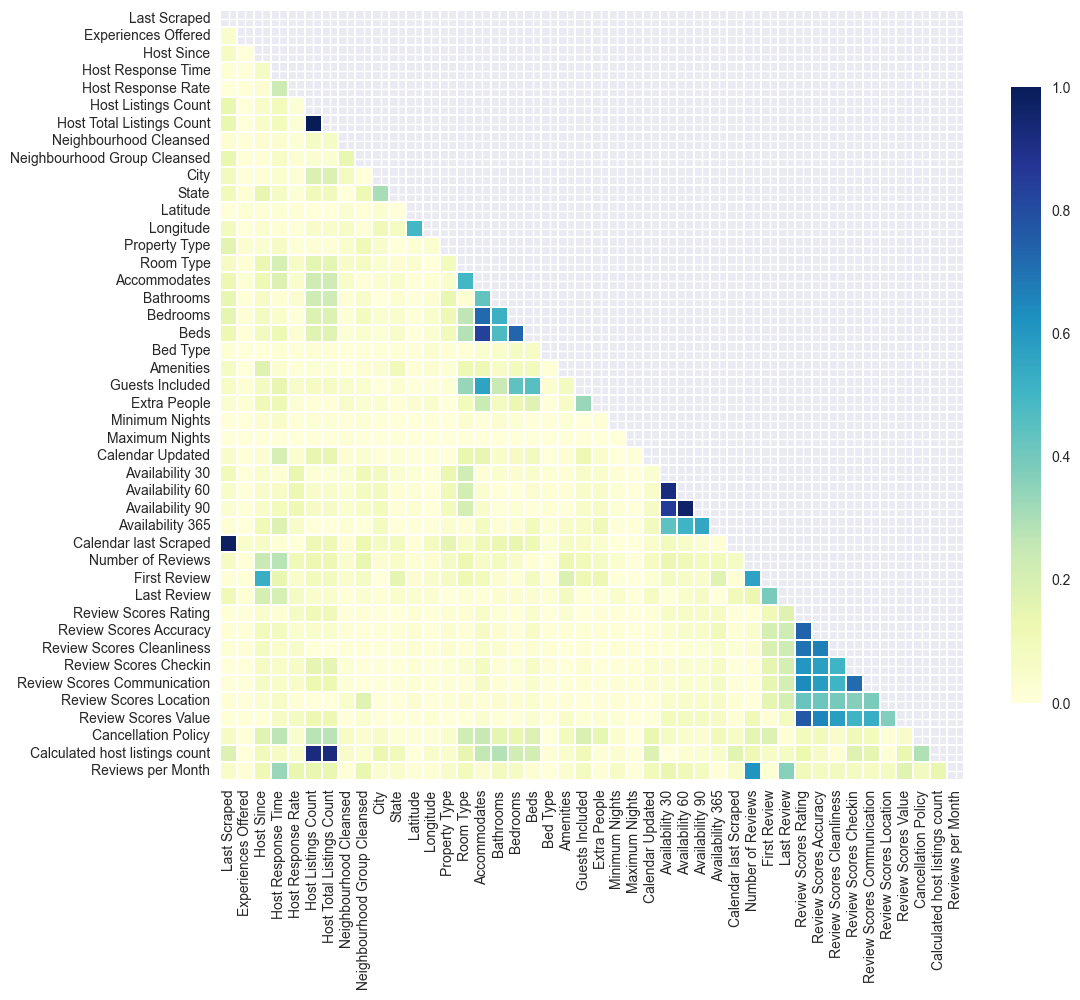

In [79]:
# Análisis de Correlación
# Para ver qué variables influyen más en el precio:

# Compute the correlation matrix
corr = np.abs(airbnb_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

+ Host Total Listings Count vs Host Listings Count

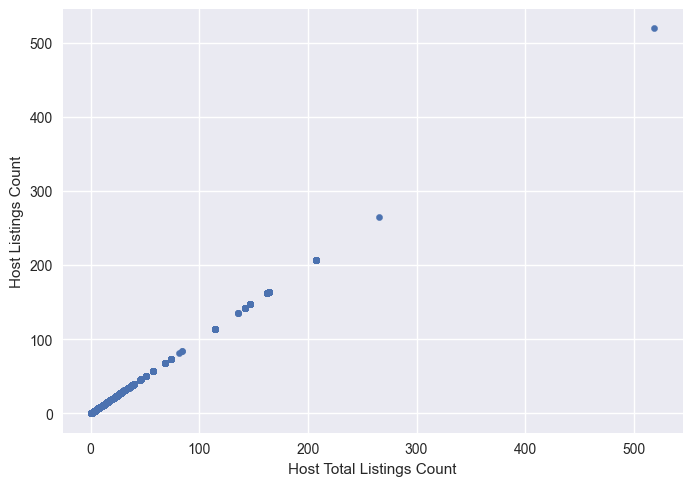

In [80]:
airbnb_data.plot(kind = 'scatter', x='Host Total Listings Count', y='Host Listings Count')
plt.xlabel('Host Total Listings Count')
plt.ylabel('Host Listings Count')
plt.show()

+ Eliminamos Host Listings Count ya que también tiene correlación con Calculated host listing count

In [81]:
airbnb_data = airbnb_data.drop(['Host Listings Count'], axis=1)

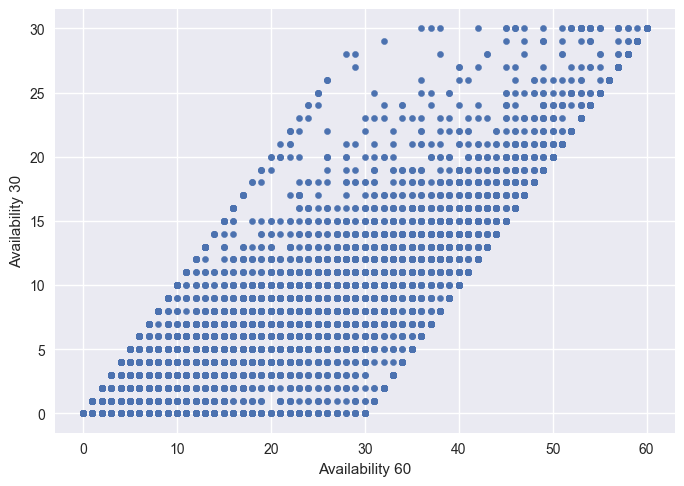

In [82]:
airbnb_data.plot(kind = 'scatter', x='Availability 60', y='Availability 30')
plt.xlabel('Availability 60')
plt.ylabel('Availability 30')
plt.show()

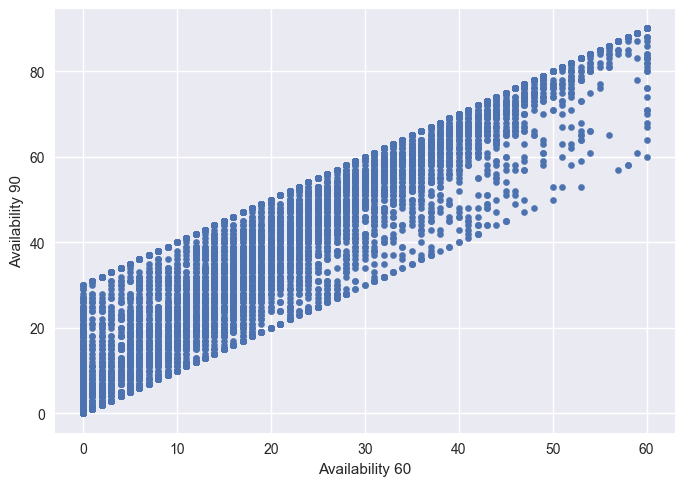

In [83]:
airbnb_data.plot(kind = 'scatter', x='Availability 60', y='Availability 90')
plt.xlabel('Availability 60')
plt.ylabel('Availability 90')
plt.show()

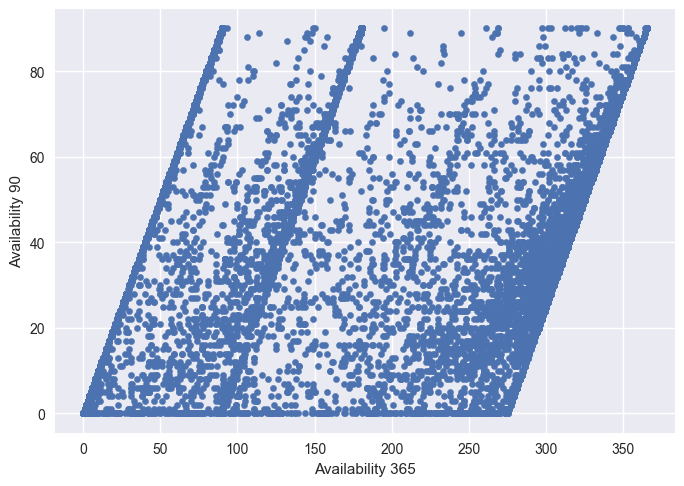

In [84]:
airbnb_data.plot(kind = 'scatter', x='Availability 365', y='Availability 90')
plt.xlabel('Availability 365')
plt.ylabel('Availability 90')
plt.show()

+ Con la disponibilidad podemos observar que hay mucha correlaciòn 30, 60, 90 y 365. Eliminamos todas y nos quedamos con 365 ya que contiene más información

In [85]:
airbnb_data = airbnb_data.drop(
    ["Availability 30", "Availability 60", "Availability 90"], axis=1
)

+ Separamos los datos en X(caracteristicas) e Y(objetivo)

In [86]:
X = airbnb_data.drop(columns=["Price"])
y = airbnb_data["Price"]

print("Filas, columnas", X.shape)

Filas, columnas (11819, 40)


+ Vemos como están distribuidos la variable precio en train y test

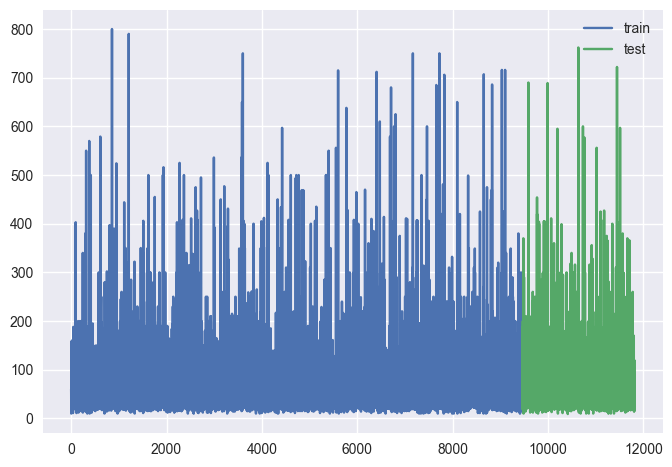

In [87]:
offset = int(len(X)*0.2) 

X_train = X.iloc[:-offset, :]
y_train = y.iloc[:-offset]
X_test = X.iloc[-offset:, :]
y_test = y.iloc[-offset:]

plt.plot(range(0,len(y_train)),y_train, label='train')
plt.plot(range(len(y_train),len(y)),y_test,label='test')
plt.legend()
plt.show()

+ Escalamos las caracteristicas antes de entrenarlo y hacer test

In [88]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

+ Usamos el algoritmo de regularizaciòn Lasso para ver si encontramos más variables incosistentes

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ...........................alpha=1.6681005372000592; total time=   0.0s
[CV] END ...........................alpha=1.6681005372000592; total time=   0.0s
[CV] END ...........................alpha=1.6681005372000592; total time=   0.0s
[CV] END ...........................alpha=27.825594022071257; total time=   0.0s
[CV] END ...........................alpha=27.825594022071257; total time=   0.0s
[CV] END ...........................alpha=27.825594022071257; total time=   0.0s
[CV] END ............................alpha=464.1588833612782; total time=   0.0s
[CV] END ............................alpha=464.1588833612782; total time=   0.0s
[CV] END ............................alpha=464.1

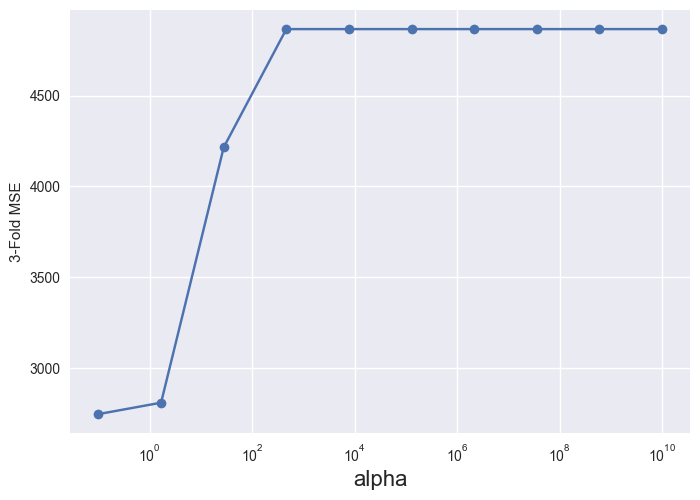

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,10)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [92]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_["alpha"]
lasso = Lasso(alpha=alpha_optimo).fit(X_train_scaled, y_train)

y_train_lasso = lasso.predict(X_train_scaled)
y_test_lasso = lasso.predict(X_test_scaled)
mse_train_model_lasso = mean_squared_error(y_train, y_train_lasso)
mse_test_model_lasso = mean_squared_error(y_test, y_test_lasso)

print("MSE Modelo Lasso (train): %0.3g" % mse_train_model_lasso)
print("MSE Modelo Lasso (test) : %0.3g" % mse_test_model_lasso)

print("RMSE Modelo Lasso (train): %0.3g" % np.sqrt(mse_train_model_lasso))
print("RMSE Modelo Lasso (test) : %0.3g" % np.sqrt(mse_test_model_lasso))

MSE Modelo Lasso (train): 2.67e+03
MSE Modelo Lasso (test) : 2.82e+03
RMSE Modelo Lasso (train): 51.7
RMSE Modelo Lasso (test) : 53.1


In [93]:
coef_series = pd.Series(lasso.coef_, index=X_train.columns)
print("Coeficientes Lasso:")
print(coef_series)

Coeficientes Lasso:
Last Scraped                      -0.000000
Experiences Offered               -2.287802
Host Since                         0.428092
Host Response Time                -4.476458
Host Response Rate                 0.667721
Host Total Listings Count         13.334459
Neighbourhood Cleansed             1.966469
Neighbourhood Group Cleansed       2.540847
City                               2.187021
State                             10.202639
Latitude                          -2.387745
Longitude                         -3.848830
Property Type                      2.224175
Room Type                        -14.831447
Accommodates                      18.627476
Bathrooms                         11.011606
Bedrooms                          13.765195
Beds                              -3.732079
Bed Type                           0.372576
Amenities                         -5.199483
Guests Included                   -0.226635
Extra People                      -0.865129
Minimum Nigh

In [94]:
selected_features = coef_series[coef_series != 0].index
print("Variables retenidas por Lasso:\n", selected_features.tolist())

Variables retenidas por Lasso:
 ['Experiences Offered', 'Host Since', 'Host Response Time', 'Host Response Rate', 'Host Total Listings Count', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Guests Included', 'Extra People', 'Minimum Nights', 'Calendar Updated', 'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Calculated host listings count', 'Reviews per Month']


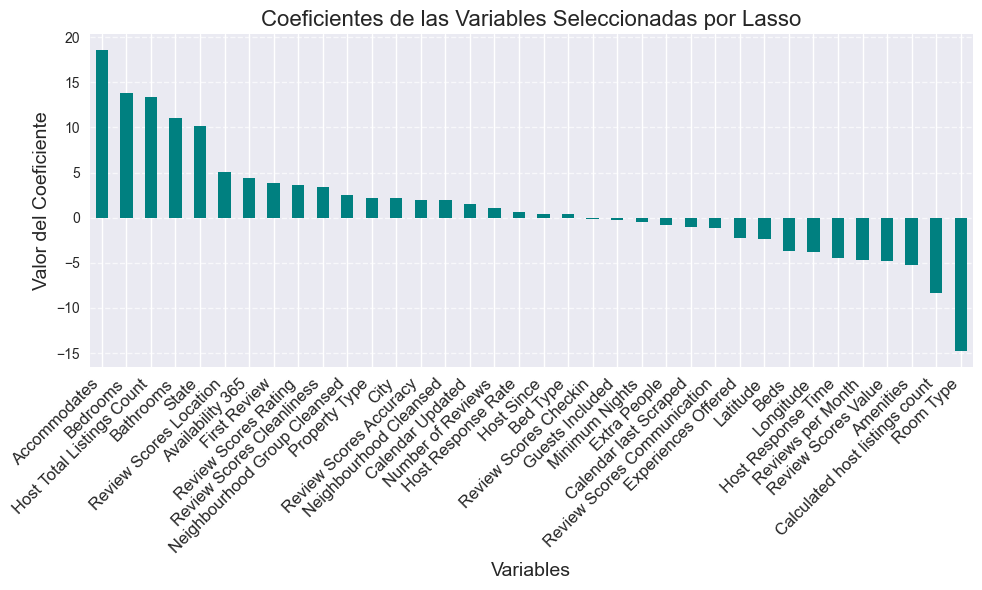

In [95]:
selected_features = coef_series[coef_series != 0]

plt.figure(figsize=(10, 6))
selected_features.sort_values(ascending=False).plot(kind="bar", color="teal")

plt.title("Coeficientes de las Variables Seleccionadas por Lasso", fontsize=16)
plt.ylabel("Valor del Coeficiente", fontsize=14)
plt.xlabel("Variables", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

In [96]:
columns_to_drop = coef_series[coef_series == 0].index
print("Columnas que se eliminarán:\n", columns_to_drop.tolist())

Columnas que se eliminarán:
 ['Last Scraped', 'Maximum Nights', 'Last Review', 'Cancellation Policy']


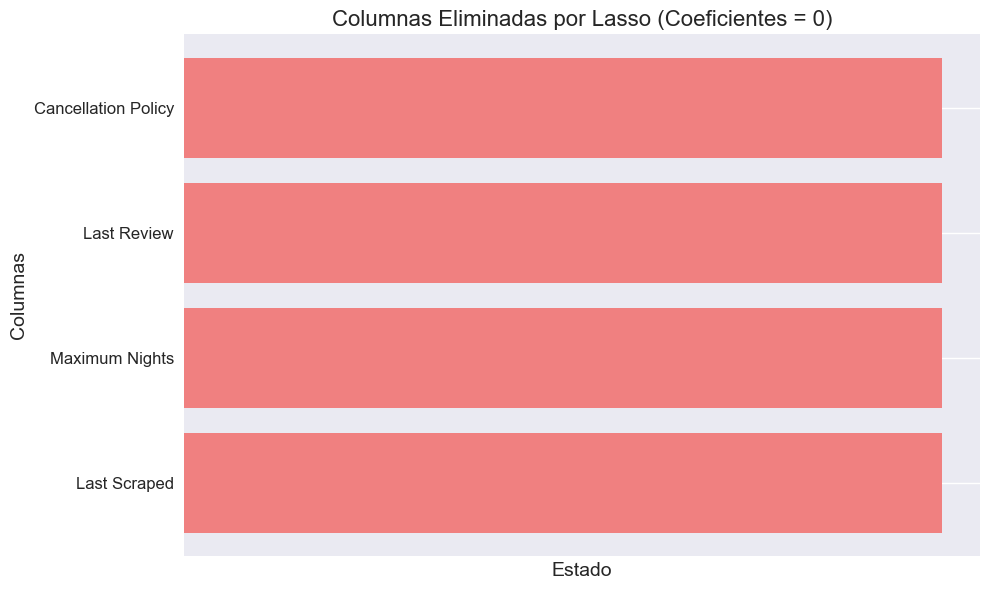

In [97]:
plt.figure(figsize=(10, 6))
plt.barh(columns_to_drop, [1] * len(columns_to_drop), color="lightcoral")

plt.title("Columnas Eliminadas por Lasso (Coeficientes = 0)", fontsize=16)
plt.xlabel("Estado", fontsize=14)
plt.ylabel("Columnas", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks([])  # Ocultar el eje X, ya que no es relevante aquí
plt.tight_layout()

plt.show()

In [98]:
X_train_lasso = X_train.drop(columns=columns_to_drop)
X_test_lasso = X_test.drop(columns=columns_to_drop)

print("Columnas originales:", X_train.shape[1])
print("Columnas tras eliminar:", X_train_lasso.shape[1])

Columnas originales: 40
Columnas tras eliminar: 36


In [99]:
X_train_lasso_scaled = scaler.fit_transform(X_train)
X_test_lasso_scaled = scaler.transform(X_test)

# 4. Modelado

+ Por simplicidad juntamos todo el analisis de datos y procesamiento en esta celda

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (
    RandomForestRegressor,
    BaggingRegressor,
    GradientBoostingRegressor,
)
from sklearn.tree import DecisionTreeRegressor


# Función para transformar de forma segura usando un LabelEncoder entrenado.
def safe_transform(le, series):
    """
    Transforma la serie usando el LabelEncoder `le`.
    Si se encuentra un valor no presente en le.classes_, se reemplaza por un valor predeterminado.
    """
    # Convertir las clases aprendidas a un conjunto para búsquedas rápidas.
    clases = set(le.classes_)
    # Valor por defecto: el primer valor de las clases del encoder.
    valor_default = le.classes_[0]
    # Reemplazar valores desconocidos por el valor predeterminado.
    series_reemplazada = series.apply(lambda x: x if x in clases else valor_default)
    # Transformar la serie ya corregida.
    return le.transform(series_reemplazada)


# ===============================
# 1. Cargar los datasets
# ===============================
airbnb_train = pd.read_csv("./airbnb_train.csv", sep=";", decimal=".")
airbnb_test = pd.read_csv("./airbnb_test.csv", sep=";", decimal=".")

# ===============================
# 2. Eliminación de columnas no deseadas
# ===============================
cols_eliminar = [
    "ID",
    "Scrape ID",
    "Listing Url",
    "Host ID",
    "Host URL",
    "Host Name",
    "Name",
    "Summary",
    "Description",
    "Space",
    "Neighborhood Overview",
    "Notes",
    "Transit",
    "Access",
    "Interaction",
    "House Rules",
    "Thumbnail Url",
    "Medium Url",
    "Picture Url",
    "XL Picture Url",
    "Host Thumbnail Url",
    "Host Picture Url",
    "Square Feet",
    "License",
    "Jurisdiction Names",
    "Host Acceptance Rate",
    "Neighbourhood",
    "Street",
    "Zipcode",
    "Market",
    "Smart Location",
    "Country Code",
    "Country",
    "Geolocation",
    "Features",
    "Host About",
    "Host Location",
    "Host Neighbourhood",
    "Host Verifications",
]

airbnb_train.drop(columns=cols_eliminar, errors="ignore", inplace=True)
airbnb_test.drop(columns=cols_eliminar, errors="ignore", inplace=True)

# ===============================
# 3. Eliminación de columnas con más del 30% de valores nulos (en train)
# ===============================
missing_train = airbnb_train.isnull().sum() / len(airbnb_train) * 100
cols_missing_train = missing_train[missing_train > 30].index.tolist()
airbnb_train.drop(columns=cols_missing_train, inplace=True)
# En test se eliminan las mismas columnas (si existen)
airbnb_test.drop(
    columns=[col for col in cols_missing_train if col in airbnb_test.columns],
    inplace=True,
)

# ===============================
# 4. Imputación de valores nulos
# ===============================
# Variables numéricas: se imputan con la mediana calculada en train
num_cols_train = airbnb_train.select_dtypes(include=["number"]).columns
for col in num_cols_train:
    median_val = airbnb_train[col].median()
    airbnb_train[col].fillna(median_val, inplace=True)

num_cols_test = airbnb_test.select_dtypes(include=["number"]).columns
for col in num_cols_test:
    if col in airbnb_train.columns:
        median_val = airbnb_train[col].median()
    else:
        median_val = airbnb_test[col].median()
    airbnb_test[col].fillna(median_val, inplace=True)

# Variables categóricas: imputar "NA"
cat_cols_train = airbnb_train.select_dtypes(include=["object"]).columns
for col in cat_cols_train:
    airbnb_train[col].fillna("NA", inplace=True)

cat_cols_test = airbnb_test.select_dtypes(include=["object"]).columns
for col in cat_cols_test:
    airbnb_test[col].fillna("NA", inplace=True)

# ===============================
# 5. Codificación de variables categóricas
# ===============================
label_encoders = {}
for col in cat_cols_train:
    le = LabelEncoder()
    airbnb_train[col] = le.fit_transform(airbnb_train[col].astype(str))
    label_encoders[col] = le

for col in cat_cols_test:
    if col in label_encoders:
        le = label_encoders[col]
        airbnb_test[col] = safe_transform(le, airbnb_test[col].astype(str))
    else:
        le = LabelEncoder()
        airbnb_test[col] = le.fit_transform(airbnb_test[col].astype(str))
        label_encoders[col] = le

# ===============================
# 6. Filtrado de outliers y eliminación de columnas adicionales
# ===============================
# Filtrar precios mayores a 820 (aplicado en train y test)
airbnb_train = airbnb_train[airbnb_train["Price"] <= 820]
airbnb_test = airbnb_test[airbnb_test["Price"] <= 820]

cols_extra = [
    "Host Listings Count",
    "Availability 30",
    "Availability 60",
    "Availability 90",
]
airbnb_train.drop(columns=cols_extra, errors="ignore", inplace=True)
airbnb_test.drop(columns=cols_extra, errors="ignore", inplace=True)

In [113]:
airbnb_train.head()

Last Scraped  Experiences Offered  Host Since  Host Response Time  \
0            24                    2        1326                   3   
1            24                    2        1788                   4   
2            24                    2        1783                   4   
3            24                    2         992                   3   
4            24                    2         246                   4   

   Host Response Rate  Host Total Listings Count  Neighbourhood Cleansed  \
0               100.0                        2.0                     189   
1               100.0                        1.0                     345   
2               100.0                       16.0                     390   
3               100.0                      114.0                     130   
4               100.0                        2.0                     149   

   Neighbourhood Group Cleansed  City  State  ...  Review Scores Rating  \
0                            35   106     26  ...                  95.0   
1                             8   106     26  ...                  91.0   
2                             7   106     26  ...                  94.0   
3                             8   106     26  ...                  94.0   
4                            10   106      0  ...                  92.0   

   Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  \
0                     9.0                       10.0                   10.0   
1                     9.0                        9.0                   10.0   
2                    10.0                       10.0                   10.0   
3                    10.0                       10.0                   10.0   
4                     9.0                        9.0                    9.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                         10.0                    10.0                  9.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                  9.0   
3                         10.0                    10.0                  9.0   
4                         10.0                     9.0                  9.0   

   Cancellation Policy  Calculated host listings count  Reviews per Month  
0                    2                             2.0               0.50  
1                    0                             1.0               2.43  
2                    2                            16.0               1.21  
3                    4                            97.0               1.21  
4                    4                             2.0               2.08  

[5 rows x 41 columns]

In [114]:
airbnb_test.head()

Last Scraped  Experiences Offered  Host Since  Host Response Time  \
0            24                    2        1737                   4   
1            24                    2        1264                   4   
2            24                    2         432                   3   
3            24                    2        1375                   0   
4            24                    2        1417                   0   

   Host Response Rate  Host Total Listings Count  Neighbourhood Cleansed  \
0               100.0                        1.0                     218   
1               100.0                        3.0                     262   
2                80.0                        1.0                      15   
3               100.0                        1.0                     221   
4               100.0                        2.0                     130   

   Neighbourhood Group Cleansed  City  State  ...  Review Scores Rating  \
0                            47   106     26  ...                 100.0   
1                             8   106     26  ...                  96.0   
2                            10   106     26  ...                  94.0   
3                            21   106     26  ...                 100.0   
4                             8   106     26  ...                  94.0   

   Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  \
0                    10.0                       10.0                   10.0   
1                    10.0                       10.0                   10.0   
2                    10.0                       10.0                   10.0   
3                    10.0                       10.0                   10.0   
4                    10.0                       10.0                   10.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                         10.0                     9.0                 10.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                  9.0   
3                         10.0                    10.0                 10.0   
4                         10.0                    10.0                  9.0   

   Cancellation Policy  Calculated host listings count  Reviews per Month  
0                    0                             1.0               1.59  
1                    2                             3.0               1.20  
2                    4                             1.0               1.21  
3                    2                             1.0               0.24  
4                    0                             2.0               1.21  

[5 rows x 41 columns]

In [115]:
# ===============================
# 8. Escalación de features (StandardScaler)
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
# ===============================
# 9. Selección de variables con Lasso
# ===============================
alpha_vector = np.logspace(-1, 10, 10)
param_grid_lasso = {"alpha": alpha_vector}
grid_lasso = GridSearchCV(
    Lasso(),
    param_grid=param_grid_lasso,
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=2,
)
grid_lasso.fit(X_train_scaled, y_train)
alpha_optimo = grid_lasso.best_params_["alpha"]

lasso = Lasso(alpha=alpha_optimo).fit(X_train_scaled, y_train)
coef_series = pd.Series(lasso.coef_, index=X_train.columns)
columns_to_drop = coef_series[coef_series == 0].index.tolist()

X_train_lasso = X_train.drop(columns=columns_to_drop)
X_test_lasso = X_test.drop(columns=columns_to_drop)

X_train_lasso_scaled = scaler.fit_transform(X_train_lasso)
X_test_lasso_scaled = scaler.transform(X_test_lasso)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ...........................alpha=1.6681005372000592; total time=   0.0s
[CV] END ...........................alpha=1.6681005372000592; total time=   0.0s
[CV] END ...........................alpha=1.6681005372000592; total time=   0.0s
[CV] END ...........................alpha=27.825594022071257; total time=   0.0s
[CV] END ...........................alpha=27.825594022071257; total time=   0.0s
[CV] END ...........................alpha=27.825594022071257; total time=   0.0s
[CV] END ............................alpha=464.1588833612782; total time=   0.0s
[CV] END ............................alpha=464.1588833612782; total time=   0.0s
[CV] END ............................alpha=464.1

## 4.1. RandomForestRegressor

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=1; total time=   0.8s
[CV] END ........................................max_depth=2; total time=   1.2s
[CV] END ........................................max_depth=2; total time=   1.3s
[CV] END ........................................max_depth=2; total time=   1.3s
[CV] END ........................................max_depth=3; total time=   1.7s
[CV] END ........................................max_depth=3; total time=   1.6s
[CV] END ........................................max_depth=3; total time=   1.6s
[CV] END ........................................max_depth=4; total time=   2.1s
[CV] END ........................................max_depth=4; total time=   2.1s
[CV] END .......................................

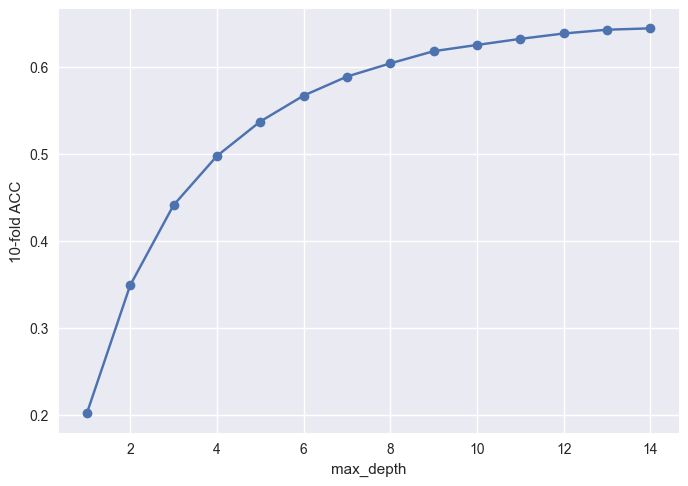

In [117]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1, 15)
tuned_parameters = {"max_depth": maxDepth}

grid = GridSearchCV(
    RandomForestRegressor(random_state=0, n_estimators=200, max_features="sqrt"),
    param_grid=tuned_parameters,
    cv=3,
    verbose=2,
)
grid.fit(X_train_lasso_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_["mean_test_score"])
plt.plot(maxDepth, scores, "-o")
plt.xlabel("max_depth")
plt.ylabel("10-fold ACC")

plt.show()

In [118]:
maxDepthOptimo = grid.best_params_["max_depth"]
randomForest = RandomForestRegressor(
    max_depth=maxDepthOptimo, n_estimators=200, max_features="sqrt"
).fit(X_train_lasso_scaled, y_train)

print("RandomForest - Train R²: ", randomForest.score(X_train_lasso_scaled, y_train))
print("RandomForest - Test R²: ", randomForest.score(X_test_lasso_scaled, y_test))

RandomForest - Train R²:  0.8981716490956726
RandomForest - Test R²:  0.644592096903317


## 4.2. BaggingRegressor

Fitting 3 folds for each of 14 candidates, totalling 42 fits


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=1; total time=   3.3s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=1; total time=   3.3s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=1; total time=   3.2s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=2; total time=   5.7s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=2; total time=   5.7s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=2; total time=   5.7s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=3; total time=   8.3s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=3; total time=   8.3s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=3; total time=   8.3s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=4; total time=  10.6s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=4; total time=  11.0s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=4; total time=  10.7s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=5; total time=  13.6s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=5; total time=  13.8s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=5; total time=  13.4s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=6; total time=  16.0s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=6; total time=  15.5s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=6; total time=  15.8s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=7; total time=  18.6s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=7; total time=  18.4s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=7; total time=  18.8s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=8; total time=  21.1s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=8; total time=  21.9s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=8; total time=  21.4s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=9; total time=  24.1s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=9; total time=  24.1s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ........................base_estimator__max_depth=9; total time=  24.1s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=10; total time=  26.9s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=10; total time=  26.9s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=10; total time=  26.7s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=11; total time=  24.7s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=11; total time=  12.4s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=11; total time=  12.2s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=12; total time=  13.4s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=12; total time=  13.5s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=12; total time=  13.7s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=13; total time=  14.7s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=13; total time=  14.9s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=13; total time=  15.1s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=14; total time=  16.5s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=14; total time=  16.0s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .......................base_estimator__max_depth=14; total time=  16.1s


c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


best mean cross-validation score: 0.622
best parameters: {'base_estimator__max_depth': 14}


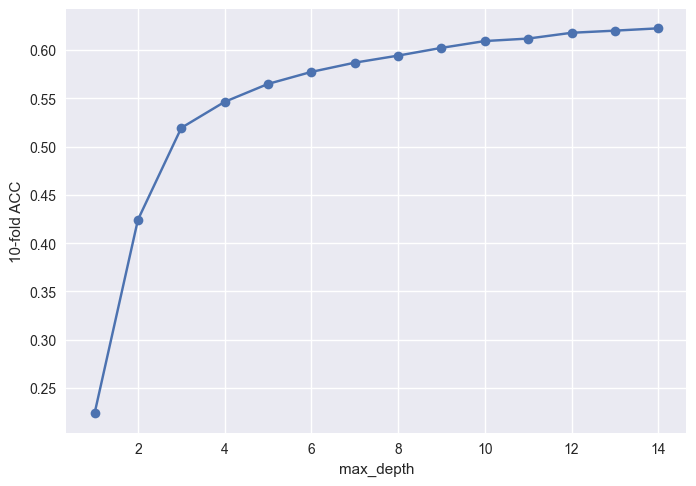

In [119]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# ... código aquí: GridSearch
maxDepth = range(1, 15)
tuned_parameters = {"base_estimator__max_depth": maxDepth}

grid = GridSearchCV(
    BaggingRegressor(
        base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200
    ),
    param_grid=tuned_parameters,
    cv=3,
    verbose=2,
)
grid.fit(X_train_lasso_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_["mean_test_score"])
plt.plot(maxDepth, scores, "-o")
plt.xlabel("max_depth")
plt.ylabel("10-fold ACC")

plt.show()

In [120]:
# ... código aquí: prestaciones en train y test
maxDepthOptimo = grid.best_params_["base_estimator__max_depth"]
baggingModel = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo), n_estimators=200
).fit(X_train_lasso_scaled, y_train)

print("Bagging - Train R²: ", baggingModel.score(X_train_lasso_scaled, y_train))
print("Bagging - Test R²: ", baggingModel.score(X_test_lasso_scaled, y_test))

c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\machine-learning-keepcoding\env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging - Train R²:  0.9070414474634065
Bagging - Test R²:  0.627733395193556


## 4.3. GradientBoostingRegressor

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [1500,2000]  # barridos super pequeños: habría que aumentarlos
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train_lasso_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  34.6s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  34.7s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  34.8s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  47.0s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  48.0s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  49.3s
[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=  35.7s
[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=  35.7s
[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=  34.8s
[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=  46.3s
[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=  46.7s
[CV] END ..............learning_rate=0.05, n_esti

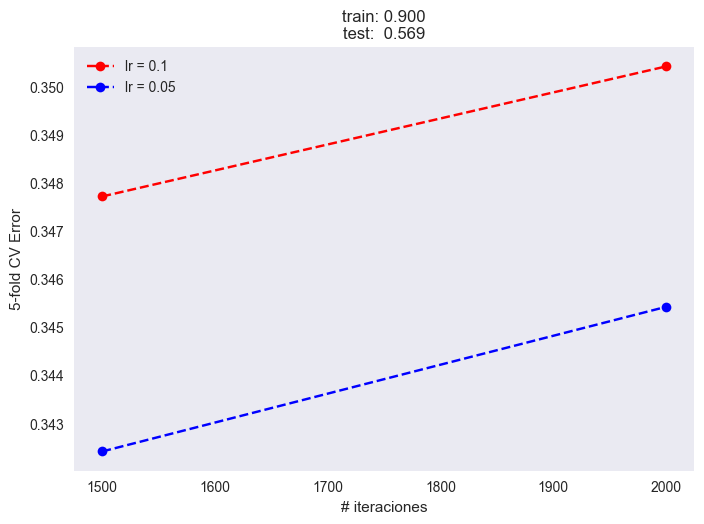

In [122]:
lrOptimo = grid.best_params_["learning_rate"]
neOptimo = grid.best_params_["n_estimators"]
bt = GradientBoostingRegressor(
    random_state=0, max_depth=3, learning_rate=lrOptimo, n_estimators=neOptimo
)
bt.fit(X_train_lasso_scaled, y_train)

error = 1 - grid.cv_results_["mean_test_score"].reshape(
    len(learningRate), len(Niterations)
)
colors = ["r", "b", "g", "k", "m"]
for i, lr in enumerate(learningRate):
    plt.plot(Niterations, error[i, :], colors[i] + "--o", label="lr = %g" % lr)

plt.legend()
plt.xlabel("# iteraciones")
plt.ylabel("5-fold CV Error")
plt.title(
    "train: %0.3f\ntest:  %0.3f"
    % (bt.score(X_train_lasso_scaled, y_train), bt.score(X_test_lasso_scaled, y_test))
)
plt.grid()
plt.show()

In [123]:
lrOptimo = grid.best_params_["learning_rate"]
neOptimo = grid.best_params_["n_estimators"]
baggingModel = GradientBoostingRegressor(
    max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo
).fit(X_train_lasso_scaled, y_train)

print("GradientBoosting - Train R²: ", baggingModel.score(X_train_lasso_scaled, y_train))
print("GradientBoosting - Test R²: ", baggingModel.score(X_test_lasso_scaled, y_test))

GradientBoosting - Train R²:  0.899721398239356
GradientBoosting - Test R²:  0.5690902223096419


## 4.4. XGBRegressor

In [124]:
from xgboost import XGBRegressor
param_grid_xgb = {
    'n_estimators': [1500, 2000],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 4, 5]
}
grid_xgb = GridSearchCV(
    XGBRegressor(random_state=0, objective='reg:squarederror'),
    param_grid=param_grid_xgb,
    cv=3,
    verbose=2
)
grid_xgb.fit(X_train_lasso_scaled, y_train)
print("XGBRegressor - Mejor score CV: {:.3f}".format(grid_xgb.best_score_))
print("XGBRegressor - Mejor parámetros: {}".format(grid_xgb.best_params_))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..learning_rate=0.1, max_depth=3, n_estimators=1500; total time=   0.5s
[CV] END ..learning_rate=0.1, max_depth=3, n_estimators=1500; total time=   0.5s
[CV] END ..learning_rate=0.1, max_depth=3, n_estimators=1500; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=3, n_estimators=2000; total time=   0.9s
[CV] END ..learning_rate=0.1, max_depth=3, n_estimators=2000; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=3, n_estimators=2000; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=1500; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=1500; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=1500; total time=   0.7s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=2000; total time=   1.1s
[CV] END ..learning_rate=0.1, max_depth=4, n_estimators=2000; total time=   1.0s
[CV] END ..learning_rate=0.1, max_depth=4, n_est

In [125]:
best_params_xgb = grid_xgb.best_params_
xgb_model = XGBRegressor(
    random_state=0,
    objective="reg:squarederror",
    n_estimators=best_params_xgb["n_estimators"],
    learning_rate=best_params_xgb["learning_rate"],
    max_depth=best_params_xgb["max_depth"],
)
xgb_model.fit(X_train_lasso_scaled, y_train)
print("XGBRegressor - Train R²: ", xgb_model.score(X_train_lasso_scaled, y_train))
print("XGBRegressor - Test R²: ", xgb_model.score(X_test_lasso_scaled, y_test))

XGBRegressor - Train R²:  0.8720621273544513
XGBRegressor - Test R²:  0.6027996071234645


## 4.5. LGBMRegressor

In [126]:
from lightgbm import LGBMRegressor

param_grid_lgbm = {
    "n_estimators": [1500, 2000],
    "learning_rate": [0.1, 0.05],
    "max_depth": [3, 4, 5],
}
grid_lgbm = GridSearchCV(
    LGBMRegressor(random_state=0), param_grid=param_grid_lgbm, cv=3, verbose=2
)
grid_lgbm.fit(X_train_lasso_scaled, y_train)
print("LGBMRegressor - Mejor score CV: {:.3f}".format(grid_lgbm.best_score_))
print("LGBMRegressor - Mejor parámetros: {}".format(grid_lgbm.best_params_))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2778
[LightGBM] [Info] Number of data points in the train set: 6304, number of used features: 35
[LightGBM] [Info] Start training from score 74.503331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [127]:
from lightgbm import LGBMRegressor

best_params_lgbm = grid_lgbm.best_params_
lgbm_model = LGBMRegressor(
    random_state=0,
    n_estimators=best_params_lgbm['n_estimators'],
    learning_rate=best_params_lgbm['learning_rate'],
    max_depth=best_params_lgbm['max_depth']
)
lgbm_model.fit(X_train_lasso_scaled, y_train)
print("LGBMRegressor - Train R²: ", lgbm_model.score(X_train_lasso_scaled, y_train))
print("LGBMRegressor - Test R²: ", lgbm_model.score(X_test_lasso_scaled, y_test))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2843
[LightGBM] [Info] Number of data points in the train set: 9456, number of used features: 35
[LightGBM] [Info] Start training from score 73.395305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## Evaluación de modelos

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Evaluar cada modelo
model_names = ["RandomForest", "Bagging", "GradientBoosting", "XGBoost", "LGBM"]

train_scores = [
    randomForest.score(X_train_lasso_scaled, y_train),
    baggingModel.score(X_train_lasso_scaled, y_train),
    baggingModel.score(X_train_lasso_scaled, y_train),
    xgb_model.score(X_train_lasso_scaled, y_train),
    lgbm_model.score(X_train_lasso_scaled, y_train),
]

test_scores = [
    randomForest.score(X_test_lasso_scaled, y_test),
    baggingModel.score(X_test_lasso_scaled, y_test),
    baggingModel.score(X_test_lasso_scaled, y_test),
    xgb_model.score(X_test_lasso_scaled, y_test),
    lgbm_model.score(X_test_lasso_scaled, y_test),
]

evaluation_df = pd.DataFrame(
    {"Modelo": model_names, "Train R²": train_scores, "Test R²": test_scores}
)
evaluation_df.set_index("Modelo", inplace=True)
print(evaluation_df)

                  Train R²   Test R²
Modelo                              
RandomForest      0.898172  0.644592
Bagging           0.899721  0.569090
GradientBoosting  0.899721  0.569090
XGBoost           0.872062  0.602800
LGBM              0.919451  0.661623


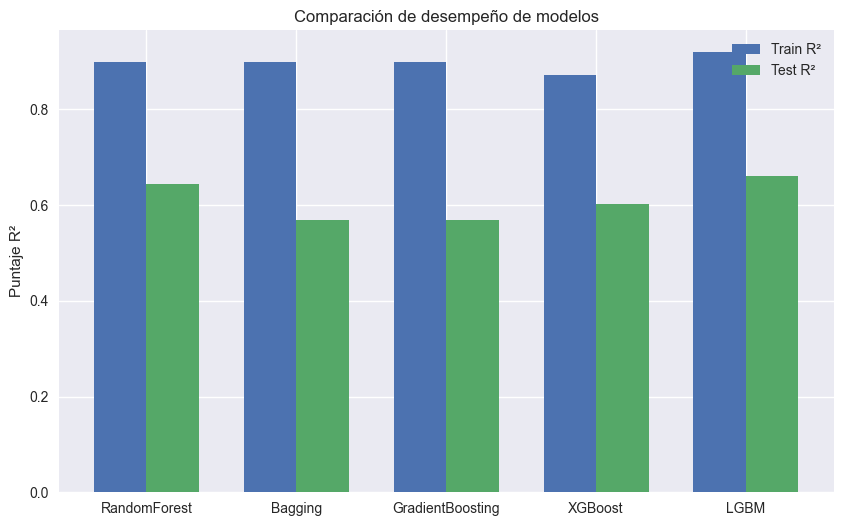

In [131]:
# Graficar los resultados comparativos
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
indices = range(len(model_names))

ax.bar([i - width / 2 for i in indices], train_scores, width=width, label="Train R²")
ax.bar([i + width / 2 for i in indices], test_scores, width=width, label="Test R²")

ax.set_xticks(indices)
ax.set_xticklabels(model_names)
ax.set_ylabel("Puntaje R²")
ax.set_title("Comparación de desempeño de modelos")
ax.legend()

plt.show()

# 5. Conclusiones

Tras la evaluación de modelos se llega a alcanzar un R² de alrededor de 0.56–0.66 en test. LGBM se ubica como el más preciso con R² = 0.661623, mientras que RandomForest queda algo rezagado en este conjunto de datos.
